# Social Media Analytics HW 1



1.   Shubhada Kapre (sk55489)
2.   Parthiv Borgohain (pb25347)
3.   James Anderson (ja47823)
4.   Saurabh Arora (sa55445)
5.   Rishabh Tiwari (rt27739)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

First let us read the training dataset

In [2]:
df_original = pd.read_csv('russiaukrainetweets.csv')
df_original.head(5)

Id               Date Created  Number of Likes  \
0      JudyWoods8  2023-02-11 02:57:52+00:00                0   
1      anchorjiya  2023-02-11 02:57:45+00:00                0   
2  AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
3      Voevoda_BY  2023-02-11 02:57:40+00:00                0   
4  NikkhahTourage  2023-02-11 02:57:39+00:00                1   

      Source of Tweet                                              Tweet  \
0  Twitter for iPhone  RT @igorsushko: #Russia: Bread line 🍞 of Ukrai...   
1  Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
2  Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
3     Twitter Web App  RT @oryxspioenkop: #UkraineWar: #Russia is now...   
4     Twitter Web App  They will send you to take holocaust class ......   

   Followers  Following  Retweet Count  
0       7633       7865            282  
1       9898        147              4  
2       1169         71             39  
3        411        113            223  
4         90         87              0

In [3]:
tweets_df = df_original
is_retweet = []
for i in tweets_df['Tweet']:
    if i.startswith("RT"):
        is_retweet.append("RT")
    else:
        is_retweet.append("Tweet")

tweets_df['is_retweet'] = is_retweet

In [4]:
is_mention = []
for i in tweets_df['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df['is_mention'] = is_mention

tweets_df.head()

Id               Date Created  Number of Likes  \
0      JudyWoods8  2023-02-11 02:57:52+00:00                0   
1      anchorjiya  2023-02-11 02:57:45+00:00                0   
2  AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
3      Voevoda_BY  2023-02-11 02:57:40+00:00                0   
4  NikkhahTourage  2023-02-11 02:57:39+00:00                1   

      Source of Tweet                                              Tweet  \
0  Twitter for iPhone  RT @igorsushko: #Russia: Bread line 🍞 of Ukrai...   
1  Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
2  Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
3     Twitter Web App  RT @oryxspioenkop: #UkraineWar: #Russia is now...   
4     Twitter Web App  They will send you to take holocaust class ......   

   Followers  Following  Retweet Count is_retweet is_mention  
0       7633       7865            282         RT          0  
1       9898        147              4         RT          0  
2       1169         71             39         RT          0  
3        411        113            223         RT          0  
4         90         87              0      Tweet          0

In [5]:
is_mention = []
for i in tweets_df['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df['is_mention'] = is_mention

In [6]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'@\w+')
tweets_df['Words'] = tweets_df['Tweet'].apply(lambda x: tokenizer.tokenize(x))

In [7]:
tweets_df = tweets_df.explode('Words')

tweet_identity = []
for i in range(len(tweets_df['is_mention'])):
    if tweets_df.iloc[i]['is_mention'] == "Mention":
        tweet_identity.append("Mention")
    else:
        tweet_identity.append(tweets_df.iloc[i]['is_retweet'])

tweets_df['tweet_identity'] = tweet_identity
df4 = tweets_df.drop(['Date Created','Number of Likes', 'is_retweet','is_mention','Tweet','Source of Tweet'], axis=1)

In [8]:
df4 = df4.rename(columns={df4.columns[1]: 'target'})
df4['target'] = df4['target'].fillna(df4['Id'])

df4.head()

Id  target  Following  Retweet Count           Words  \
0      JudyWoods8    7633       7865            282     @igorsushko   
1      anchorjiya    9898        147              4        @ABPNews   
1      anchorjiya    9898        147              4     @anchorjiya   
2  AndriyBoguslav    1169         71             39  @EmineDzheppar   
2  AndriyBoguslav    1169         71             39            @coe   

  tweet_identity  
0             RT  
1             RT  
1             RT  
2             RT  
2             RT

In [9]:
import networkx as nx

In [10]:
# Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df4, source="Id", target="target")
G

In [11]:
list(G.degree())

[('JudyWoods8', 1),
 (7633, 1),
 ('anchorjiya', 1),
 (9898, 1),
 ('AndriyBoguslav', 1),
 (1169, 1),
 ('Voevoda_BY', 1),
 (411, 1),
 ('NikkhahTourage', 1),
 (90, 1),
 ('Santin16Giorgio', 1),
 (3, 6),
 ('VivekanandMaity', 1),
 (194, 1),
 ('BrotherLeeLuv', 1),
 (913, 1),
 ('klebebrasil', 1),
 (208, 1),
 ('johnnyh92539958', 1),
 (166, 1),
 ('Amitochondrio', 1),
 (549, 1),
 ('Carolho93444463', 1),
 (619, 2),
 ('OlehOstrowsky', 1),
 (22, 3),
 ('tatersngravy_71', 1),
 (17, 4),
 ('deirtagge', 1),
 (379, 1),
 ('LaylaGorka', 1),
 (28, 1),
 ('MAMARTINEZNica', 1),
 (40, 1),
 ('tommyT2T23', 1),
 (65, 1),
 ('cleary_clearly', 1),
 (1449, 1),
 ('ASIANMARUBOZU', 1),
 (371, 1),
 ('Richard24856748', 1),
 (494, 1),
 ('jessecox1953', 1),
 (308, 1),
 ('deltacrook', 1),
 (1897, 1),
 ('mfaulstone', 1),
 (63, 4),
 ('CorruptPunjab', 1),
 (1433, 1),
 ('DakotaSidwell', 1),
 (1054, 1),
 ('kyberskeble', 1),
 (202, 1),
 ('karenchke', 1),
 (69, 1),
 ('1foreverseeking', 1),
 (7689, 1),
 ('Shashan20797894', 1),
 (154, 

In [12]:
betweenness_centrality = nx.betweenness_centrality(G)

In [13]:
closeness_centrality = nx.closeness_centrality(G)

In [14]:
degree_centrality = nx.degree_centrality(G) 
# I believe this is normalizing to fit values between 0 and 1

### Plotting of Network using NetworkX

Let us plot the network graph now.

In [15]:
def strip_at(X):
    if type(X) is str:
        return X.lstrip('@')
    else:
        return np.nan
df5=df4.copy()  
df5['Words']=df5['Words'].map(strip_at)
df5 = df5[['Id','Words','tweet_identity']]
df5=df5.rename(columns={'Id':'Id1','Words':'Id2','tweet_identity':'Interaction'})
df5 = df5[df5['Id2'].notna()]
df5.to_csv('network_nodes.csv')
df5

Id1              Id2 Interaction
0          JudyWoods8       igorsushko          RT
1          anchorjiya          ABPNews          RT
1          anchorjiya       anchorjiya          RT
2      AndriyBoguslav    EmineDzheppar          RT
2      AndriyBoguslav              coe          RT
...               ...              ...         ...
13161    craigthomler  JoeBran03134872          RT
13161    craigthomler    THE_RonTheDon          RT
13161    craigthomler       RWApodcast          RT
13162     FroodyWisco    ukraine_world          RT
13163    AimieeMobley      Therealgsns          RT

[14147 rows x 3 columns]

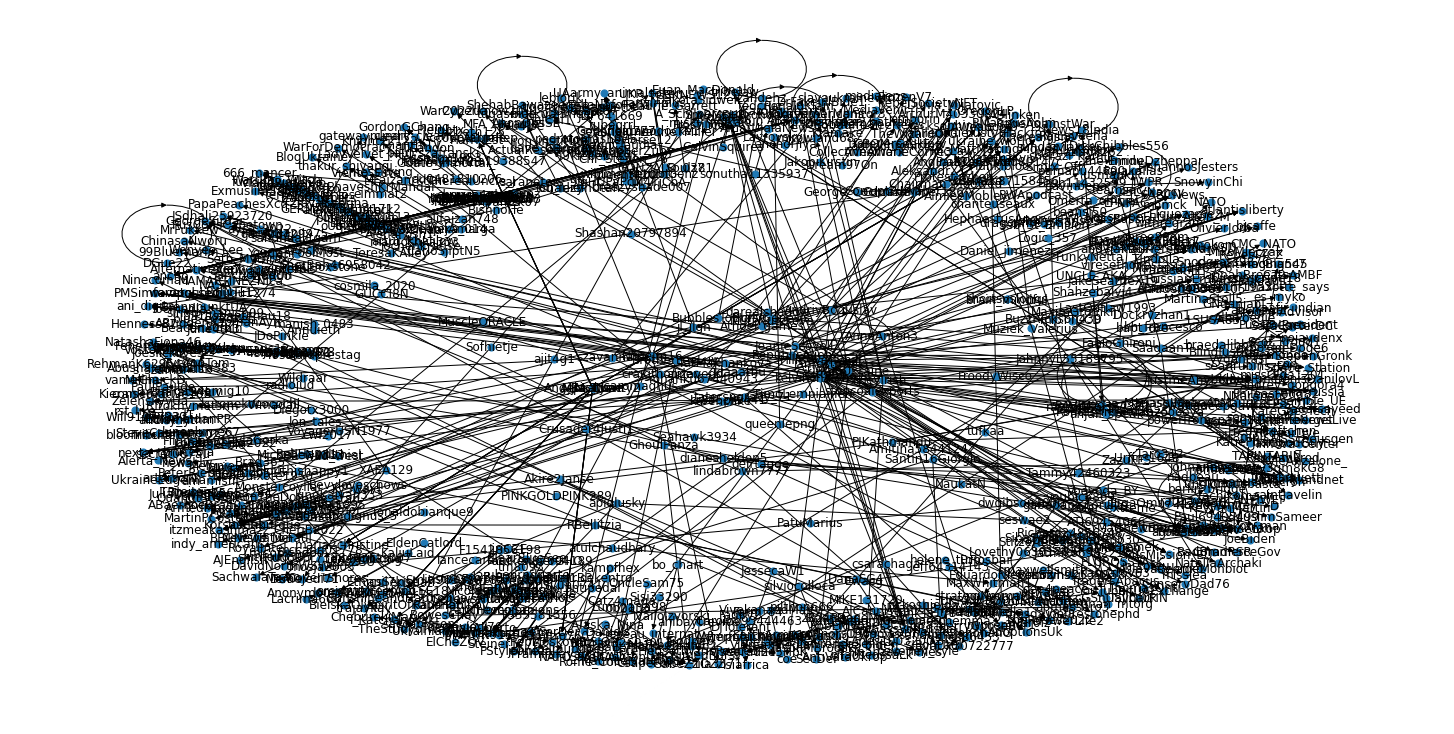

In [16]:
import matplotlib.pyplot as plt

# create network with NetworkX
df5['Nodes'] = df5[['Id1', 'Id2']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df5['Nodes'])


plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()


Now that the graph is plotted, we will continue with our calculation of network metrics

In [17]:
btw_cent = pd.DataFrame(betweenness_centrality.items(), columns=['User', 'Betweenness'])
cls_cent = pd.DataFrame(closeness_centrality.items(), columns=['User', 'Closeness'])
deg_cent = pd.DataFrame(degree_centrality.items(), columns=['User', 'Degree'])

In [18]:
merge1 = btw_cent.merge(deg_cent)
merge2 = merge1.merge(cls_cent)
merge2 = merge2.groupby("User").mean()
merge2

Betweenness    Degree  Closeness
User                                          
0                0.000029  0.005929   0.005929
1                0.000006  0.002964   0.002964
2                0.000006  0.002964   0.002964
3                0.000029  0.005929   0.005929
4                0.000006  0.002964   0.002964
...                   ...       ...        ...
xlr8mpls         0.000000  0.000988   0.000988
youbic6869       0.000000  0.000988   0.001318
yume6tsumi0      0.000000  0.000988   0.000988
yusr18413764     0.000000  0.000988   0.001318
zahdehz          0.000000  0.000988   0.000988

[1013 rows x 3 columns]

## Running the Twitter data through Influencer Model

In [19]:
tweets_df

Id               Date Created  Number of Likes  \
0          JudyWoods8  2023-02-11 02:57:52+00:00                0   
1          anchorjiya  2023-02-11 02:57:45+00:00                0   
1          anchorjiya  2023-02-11 02:57:45+00:00                0   
2      AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
2      AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
...               ...                        ...              ...   
13161    craigthomler  2023-02-11 01:18:40+00:00                0   
13161    craigthomler  2023-02-11 01:18:40+00:00                0   
13161    craigthomler  2023-02-11 01:18:40+00:00                0   
13162     FroodyWisco  2023-02-11 01:16:35+00:00                0   
13163    AimieeMobley  2023-02-11 01:14:05+00:00                0   

           Source of Tweet                                              Tweet  \
0       Twitter for iPhone  RT @igorsushko: #Russia: Bread line 🍞 of Ukrai...   
1       Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
1       Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
2       Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
2       Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
...                    ...                                                ...   
13161   Twitter for iPhone  RT @USChelseaXXfan: @Knight22122 @JoeBran03134...   
13161   Twitter for iPhone  RT @USChelseaXXfan: @Knight22122 @JoeBran03134...   
13161   Twitter for iPhone  RT @USChelseaXXfan: @Knight22122 @JoeBran03134...   
13162      Twitter Web App  RT @ukraine_world: Russia likely lost dozens o...   
13163  Twitter for Android  RT @Therealgsns: ⚠️ BREAKING: PUTIN PREPARING ...   

       Followers  Following  Retweet Count is_retweet is_mention  \
0           7633       7865            282         RT          0   
1           9898        147              4         RT          0   
1           9898        147              4         RT          0   
2           1169         71             39         RT          0   
2           1169         71             39         RT          0   
...          ...        ...            ...        ...        ...   
13161      10683      10839              1         RT          0   
13161      10683      10839              1         RT          0   
13161      10683      10839              1         RT          0   
13162       2979       4740             58         RT          0   
13163        391       1317              5         RT          0   

                  Words tweet_identity  
0           @igorsushko             RT  
1              @ABPNews             RT  
1           @anchorjiya             RT  
2        @EmineDzheppar             RT  
2                  @coe             RT  
...                 ...            ...  
13161  @JoeBran03134872             RT  
13161    @THE_RonTheDon             RT  
13161       @RWApodcast             RT  
13162    @ukraine_world             RT  
13163      @Therealgsns             RT  

[16317 rows x 12 columns]

In [20]:
user_list = list(set(list(tweets_df['Id'].drop_duplicates().values)))
len(user_list)

568

In [21]:
metrics = tweets_df[['Id','Number of Likes','Followers','Following','Retweet Count','is_retweet','is_mention']]

In [22]:
metrics

Id  Number of Likes  Followers  Following  Retweet Count  \
0          JudyWoods8                0       7633       7865            282   
1          anchorjiya                0       9898        147              4   
1          anchorjiya                0       9898        147              4   
2      AndriyBoguslav                0       1169         71             39   
2      AndriyBoguslav                0       1169         71             39   
...               ...              ...        ...        ...            ...   
13161    craigthomler                0      10683      10839              1   
13161    craigthomler                0      10683      10839              1   
13161    craigthomler                0      10683      10839              1   
13162     FroodyWisco                0       2979       4740             58   
13163    AimieeMobley                0        391       1317              5   

      is_retweet is_mention  
0             RT          0  
1             RT          0  
1             RT          0  
2             RT          0  
2             RT          0  
...          ...        ...  
13161         RT          0  
13161         RT          0  
13161         RT          0  
13162         RT          0  
13163         RT          0  

[16317 rows x 7 columns]

In [23]:
metrics['is_retweet'] = metrics['is_retweet'].replace(['Tweet'], 0)
metrics['is_retweet'] = metrics['is_retweet'].replace(['RT'], 1)
metrics['is_mention'] = metrics['is_mention'].replace(['Mention'], 1)
metrics['is_retweet'] = metrics['is_retweet'].astype('int')
metrics['is_mention'] = metrics['is_mention'].astype('int')
metrics['Number of Likes'] = metrics['Number of Likes'].astype('int')
metrics['Followers'] = metrics['Followers'].astype('int')
metrics['Following'] = metrics['Following'].astype('int')
metrics['Retweet Count'] = metrics['Retweet Count'].astype('int')

In [24]:
metrics.groupby('Id').sum().reset_index()

Id  Number of Likes  Followers  Following  Retweet Count  \
0    1foreverseeking                0     115335      88590             30   
1       1hogfanwps11                0      20760      75105           1005   
2           1i5t3n3r                0       6405       8040            750   
3           2824Bear                0      12420       6390            990   
4    2old4thishappy1                0     101790     225270            795   
..               ...              ...        ...        ...            ...   
563         xlr8mpls                0       2265       2025              0   
564       youbic6869                0       3855       8445            405   
565      yume6tsumi0               75     168660     152820            180   
566     yusr18413764                0       1170       2220              0   
567          zahdehz                0      11100     150150             30   

     is_retweet  is_mention  
0            15           0  
1            15           0  
2            15           0  
3            45           0  
4            45           0  
..          ...         ...  
563           0          15  
564          15           0  
565          30          30  
566           0           0  
567          15           0  

[568 rows x 7 columns]

In [25]:
df_users = metrics.merge(merge2, left_on = 'Id', right_on = 'User')
df_users = df_users.drop(['Number of Likes'], axis=1)

In [26]:
df_users = df_users.drop_duplicates()
df_users

Id  Followers  Following  Retweet Count  is_retweet  \
0           JudyWoods8       7633       7865            282           1   
15          anchorjiya       9898        147              4           1   
45      AndriyBoguslav       1169         71             39           1   
90      AndriyBoguslav       1169         71            154           1   
105     AndriyBoguslav       1169         71             51           1   
...                ...        ...        ...            ...         ...   
16197   EtheriousHully          6          2              0           0   
16212     craigthomler      10683      10839              1           1   
16287     AimieeMobley        391       1317              5           1   
16302  a1a697fbd80147c       2449       2825              5           1   
16316  saralbharatnews        137        192              0           0   

       is_mention  Betweenness    Degree  Closeness  
0               0          0.0  0.000988   0.000988  
15              0          0.0  0.000988   0.000988  
45              0          0.0  0.000988   0.000988  
90              0          0.0  0.000988   0.000988  
105             0          0.0  0.000988   0.000988  
...           ...          ...       ...        ...  
16197           0          0.0  0.000988   0.002745  
16212           0          0.0  0.000988   0.000988  
16287           0          0.0  0.000988   0.000988  
16302           0          0.0  0.000988   0.000988  
16316           0          0.0  0.000988   0.001318  

[741 rows x 9 columns]

In [27]:
#Using our inflluencer model from assignment
#df_users['Influence Score']=7.092293*df_users['Followers']+1.548155*df_users['Following']+0.020346*df_users['Retweet Count']+1.654815*df_users['Betweenness']+2.571194*df_users['Degree']+2.794763*df_users['Closeness']
df_users['Influence Score']=7.092293*df_users['Followers']+1.548155*df_users['Following']+0.020346*df_users['Retweet Count']+1.654815*df_users['Betweenness']+2.571194*df_users['Degree']+2.794763*df_users['Closeness']
df_users=df_users[1:]
df_users=df_users.groupby('Id').mean()
df_users=df_users.sort_values(by='Influence Score',ascending=False)

In [28]:
df_users.to_csv('top_influencers.csv')

In [29]:
#Top 30 influencers
df_users[:30]

Followers  Following  Retweet Count  is_retweet  is_mention  \
Id                                                                              
ABPNews          13254113.0       37.0      17.000000    0.000000    0.000000   
ZeeNewsEnglish    5652959.0       26.0       1.000000    0.000000    0.000000   
News18India       3094996.0       90.0       2.000000    0.000000    1.000000   
AmarUjalaNews     2085040.0       86.0       1.000000    0.000000    0.000000   
tv9gujarati        912951.0       64.0       2.000000    0.000000    0.000000   
TheStudyofWar      581790.0     2761.0       1.500000    0.000000    0.000000   
TV9Bharatvarsh     230429.0       21.0       1.750000    0.000000    0.750000   
anjali_speak       105789.0      420.0       2.000000    1.000000    0.000000   
RajLaveena          89029.0      266.0       2.000000    1.000000    0.000000   
janrostowski        57341.0      457.0      73.000000    1.000000    0.000000   
HillBeverlyhill     34277.0    33173.0      56.000000    1.000000    0.000000   
kk131066            31488.0    26137.0       2.000000    1.000000    0.000000   
RebHarms            35262.0     3195.0      19.000000    1.000000    0.000000   
ob2133              23916.0    19889.0      81.000000    1.000000    0.000000   
s_szama             26005.0     7444.0      40.000000    1.000000    0.000000   
Bharat24Liv         23682.0       15.0       1.000000    0.000000    0.000000   
oneindiagujarat     22750.0     2027.0       0.000000    0.000000    0.000000   
AlCannistra         18141.0    18762.0       5.000000    1.000000    0.000000   
HeyIrish            16071.0    16418.0      11.000000    1.000000    0.000000   
FabioGhironi        18551.0     3534.0    1107.333333    0.666667    0.333333   
OfHomoSapiens       15670.0    14197.0      90.000000    1.000000    0.000000   
GueberB             15024.0    14399.0       0.000000    0.000000    0.000000   
Guate_Inmortal_     16869.0     1829.0     195.000000    1.000000    0.000000   
radiojud            14978.0      808.0       1.000000    1.000000    0.000000   
oUqXP4RXQRmPtlw     13883.0     5046.0      37.000000    1.000000    0.000000   
craigthomler        10683.0    10839.0       1.000000    1.000000    0.000000   
bo_chart            10698.0    10296.0      22.000000    1.000000    0.000000   
BrennpunktUA        12059.0      885.0       0.000000    0.000000    0.000000   
Chr_Steven_76        9569.0     9989.0      78.500000    1.000000    0.000000   
OrioliAlberto        9515.0     9713.0      66.000000    1.000000    0.000000   

                 Betweenness    Degree  Closeness  Influence Score  
Id                                                                  
ABPNews             0.000006  0.002964   0.002964     9.400211e+07  
ZeeNewsEnglish      0.000000  0.000988   0.000988     4.009248e+07  
News18India         0.000006  0.002964   0.002964     2.195076e+07  
AmarUjalaNews       0.000000  0.000988   0.000988     1.478785e+07  
tv9gujarati         0.000000  0.000988   0.000988     6.475015e+06  
TheStudyofWar       0.000000  0.000988   0.000988     4.130500e+06  
TV9Bharatvarsh      0.000000  0.000988   0.000988     1.634303e+06  
anjali_speak        0.000000  0.000988   0.000988     7.509369e+05  
RajLaveena          0.000000  0.000988   0.000988     6.318316e+05  
janrostowski        0.000000  0.000988   0.000988     4.073882e+05  
HillBeverlyhill     0.000000  0.000988   0.000988     2.944606e+05  
kk131066            0.000000  0.000988   0.000988     2.637863e+05  
RebHarms            0.000000  0.000988   0.000988     2.550352e+05  
ob2133              0.000000  0.000988   0.000988     2.004122e+05  
s_szama             0.000000  0.000988   0.000988     1.959604e+05  
Bharat24Liv         0.000000  0.000988   0.000988     1.679829e+05  
oneindiagujarat     0.000000  0.000988   0.000988     1.644878e+05  
AlCannistra         0.000000  0.000988   0.000988     1.577079e+05  
HeyIrish            0.000000  0.000988   0.00

# What Happens if we remove top 30 influencers

In [30]:
tweets_df1 = pd.read_csv('russiaukrainetweets.csv')
tweets_df1 = tweets_df[~tweets_df['Id'].isin(df_users.index[:30])]

In [31]:
tweets_df1

Id               Date Created  Number of Likes  \
0          JudyWoods8  2023-02-11 02:57:52+00:00                0   
1          anchorjiya  2023-02-11 02:57:45+00:00                0   
1          anchorjiya  2023-02-11 02:57:45+00:00                0   
2      AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
2      AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
...               ...                        ...              ...   
13158       ooa102774  2023-02-11 01:22:58+00:00                0   
13159      albafella1  2023-02-11 01:21:11+00:00                9   
13160  EtheriousHully  2023-02-11 01:18:56+00:00                0   
13162     FroodyWisco  2023-02-11 01:16:35+00:00                0   
13163    AimieeMobley  2023-02-11 01:14:05+00:00                0   

           Source of Tweet                                              Tweet  \
0       Twitter for iPhone  RT @igorsushko: #Russia: Bread line 🍞 of Ukrai...   
1       Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
1       Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
2       Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
2       Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
...                    ...                                                ...   
13158      Twitter Web App  h2.The Battle for Bakhmut through the eyes of ...   
13159   Twitter for iPhone  🔥 40th Separate Artillery Brigade showed a ful...   
13160   Twitter for iPhone  zelensky：Foreigners go first\n\nofficial：sir t...   
13162      Twitter Web App  RT @ukraine_world: Russia likely lost dozens o...   
13163  Twitter for Android  RT @Therealgsns: ⚠️ BREAKING: PUTIN PREPARING ...   

       Followers  Following  Retweet Count is_retweet is_mention  \
0           7633       7865            282         RT          0   
1           9898        147              4         RT          0   
1           9898        147              4         RT          0   
2           1169         71             39         RT          0   
2           1169         71             39         RT          0   
...          ...        ...            ...        ...        ...   
13158          6          8              0      Tweet          0   
13159       3981       3481              1      Tweet          0   
13160          6          2              0      Tweet          0   
13162       2979       4740             58         RT          0   
13163        391       1317              5         RT          0   

                Words tweet_identity  
0         @igorsushko             RT  
1            @ABPNews             RT  
1         @anchorjiya             RT  
2      @EmineDzheppar             RT  
2                @coe             RT  
...               ...            ...  
13158             NaN          Tweet  
13159             NaN          Tweet  
13160             NaN          Tweet  
13162  @ukraine_world             RT  
13163    @Therealgsns             RT  

[15066 rows x 12 columns]

In [32]:
is_retweet = []
for i in tweets_df1['Tweet']:
    if i.startswith("RT"):
        is_retweet.append("RT")
    else:
        is_retweet.append("Tweet")

tweets_df1['is_retweet'] = is_retweet

is_mention = []
for i in tweets_df1['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df1['is_mention'] = is_mention

is_mention = []
for i in tweets_df1['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df1['is_mention'] = is_mention

tokenizer = RegexpTokenizer(r'@\w+')
tweets_df1['Words'] = tweets_df1['Tweet'].apply(lambda x: tokenizer.tokenize(x))

tweets_df1 = tweets_df1.explode('Words')

tweet_identity = []
for i in range(len(tweets_df1['is_mention'])):
    if tweets_df1.iloc[i]['is_mention'] == "Mention":
        tweet_identity.append("Mention")
    else:
        tweet_identity.append(tweets_df1.iloc[i]['is_retweet'])

tweets_df1['tweet_identity'] = tweet_identity
df6 = tweets_df1.drop(['Date Created','Number of Likes', 'is_retweet','is_mention','Tweet','Source of Tweet'], axis=1)
df6 = df6.rename(columns={df6.columns[1]: 'target'})
df6['target'] = df6['target'].fillna(df6['Id'])

df6.head()

Id  target  Following  Retweet Count        Words tweet_identity
0  JudyWoods8    7633       7865            282  @igorsushko             RT
1  anchorjiya    9898        147              4     @ABPNews             RT
1  anchorjiya    9898        147              4  @anchorjiya             RT
1  anchorjiya    9898        147              4     @ABPNews             RT
1  anchorjiya    9898        147              4  @anchorjiya             RT

In [33]:
# Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df4, source="Id", target="target")
G

In [34]:
list(G.degree())

[('JudyWoods8', 1),
 (7633, 1),
 ('anchorjiya', 1),
 (9898, 1),
 ('AndriyBoguslav', 1),
 (1169, 1),
 ('Voevoda_BY', 1),
 (411, 1),
 ('NikkhahTourage', 1),
 (90, 1),
 ('Santin16Giorgio', 1),
 (3, 6),
 ('VivekanandMaity', 1),
 (194, 1),
 ('BrotherLeeLuv', 1),
 (913, 1),
 ('klebebrasil', 1),
 (208, 1),
 ('johnnyh92539958', 1),
 (166, 1),
 ('Amitochondrio', 1),
 (549, 1),
 ('Carolho93444463', 1),
 (619, 2),
 ('OlehOstrowsky', 1),
 (22, 3),
 ('tatersngravy_71', 1),
 (17, 4),
 ('deirtagge', 1),
 (379, 1),
 ('LaylaGorka', 1),
 (28, 1),
 ('MAMARTINEZNica', 1),
 (40, 1),
 ('tommyT2T23', 1),
 (65, 1),
 ('cleary_clearly', 1),
 (1449, 1),
 ('ASIANMARUBOZU', 1),
 (371, 1),
 ('Richard24856748', 1),
 (494, 1),
 ('jessecox1953', 1),
 (308, 1),
 ('deltacrook', 1),
 (1897, 1),
 ('mfaulstone', 1),
 (63, 4),
 ('CorruptPunjab', 1),
 (1433, 1),
 ('DakotaSidwell', 1),
 (1054, 1),
 ('kyberskeble', 1),
 (202, 1),
 ('karenchke', 1),
 (69, 1),
 ('1foreverseeking', 1),
 (7689, 1),
 ('Shashan20797894', 1),
 (154, 

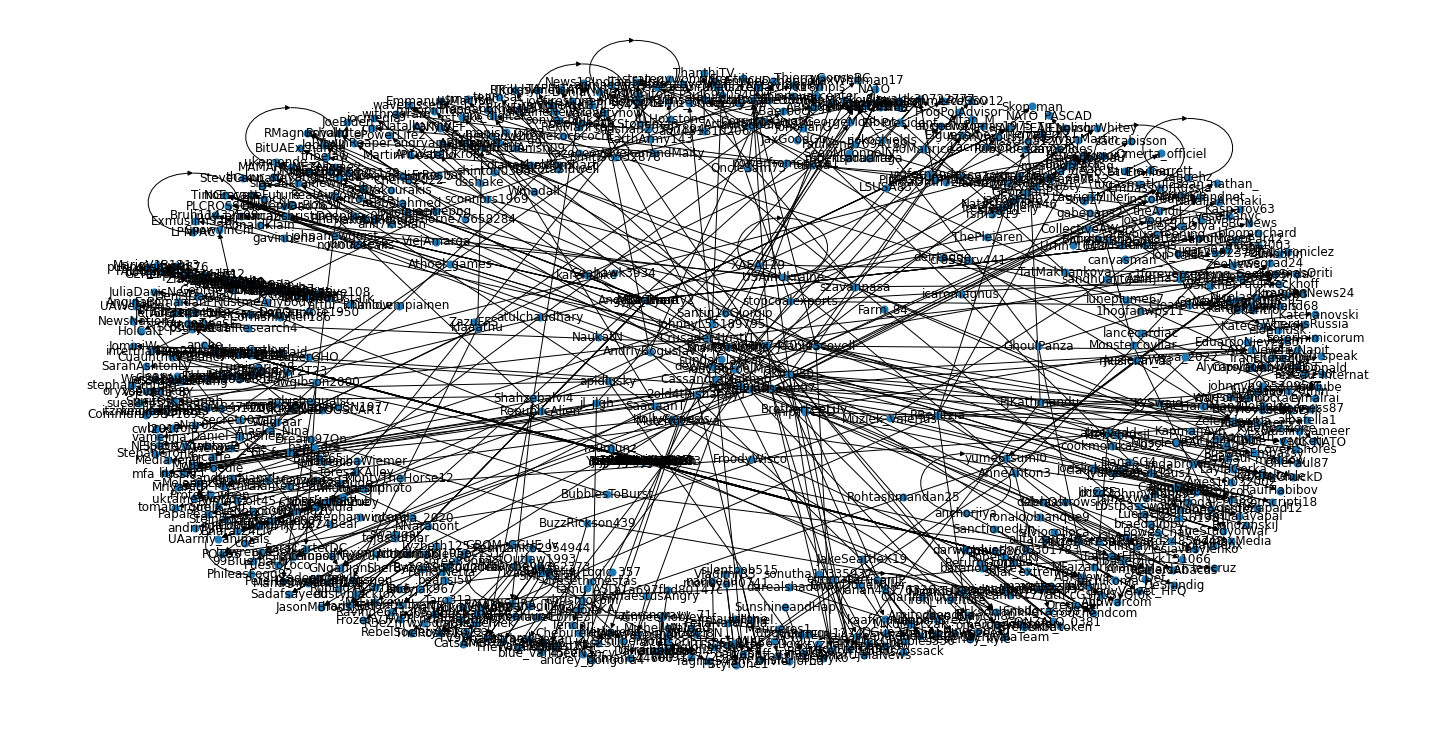

In [35]:
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G) 

def strip_at(X):
    if type(X) is str:
        return X.lstrip('@')
    else:
        return np.nan

df6['Words']=df6['Words'].map(strip_at)
df6 = df6[['Id','Words','tweet_identity']]
df6=df6.rename(columns={'Id':'Id1','Words':'Id2','tweet_identity':'Interaction'})
df6 = df6[df6['Id2'].notna()]
df6.to_csv('network_nodes.csv')


import matplotlib.pyplot as plt

# create network with NetworkX
df6['Nodes'] = df6[['Id1', 'Id2']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df6['Nodes'])


plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()


# Overall Network with influencer nodes highlighted

In [38]:
df_original = pd.read_csv('russiaukrainetweets.csv')
tweets_df3 = df_original
is_retweet = []
for i in tweets_df3['Tweet']:
    if i.startswith("RT"):
        is_retweet.append("RT")
    else:
        is_retweet.append("Tweet")

tweets_df3['is_retweet'] = is_retweet

In [39]:
is_mention = []
for i in tweets_df3['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df3['is_mention'] = is_mention

tweets_df3.head()

Id               Date Created  Number of Likes  \
0      JudyWoods8  2023-02-11 02:57:52+00:00                0   
1      anchorjiya  2023-02-11 02:57:45+00:00                0   
2  AndriyBoguslav  2023-02-11 02:57:41+00:00                0   
3      Voevoda_BY  2023-02-11 02:57:40+00:00                0   
4  NikkhahTourage  2023-02-11 02:57:39+00:00                1   

      Source of Tweet                                              Tweet  \
0  Twitter for iPhone  RT @igorsushko: #Russia: Bread line 🍞 of Ukrai...   
1  Twitter for iPhone  RT @ABPNews: Watch: पुतिन मेट डोभाल...पाकिस्ता...   
2  Twitter for iPhone  RT @EmineDzheppar: Had a fruitful meeting with...   
3     Twitter Web App  RT @oryxspioenkop: #UkraineWar: #Russia is now...   
4     Twitter Web App  They will send you to take holocaust class ......   

   Followers  Following  Retweet Count is_retweet is_mention  
0       7633       7865            282         RT          0  
1       9898        147              4         RT          0  
2       1169         71             39         RT          0  
3        411        113            223         RT          0  
4         90         87              0      Tweet          0

In [40]:
is_mention = []
for i in tweets_df3['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df3['is_mention'] = is_mention

In [41]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'@\w+')
tweets_df['Words'] = tweets_df['Tweet'].apply(lambda x: tokenizer.tokenize(x))

In [42]:
tweets_df = tweets_df.explode('Words')

tweet_identity = []
for i in range(len(tweets_df['is_mention'])):
    if tweets_df.iloc[i]['is_mention'] == "Mention":
        tweet_identity.append("Mention")
    else:
        tweet_identity.append(tweets_df.iloc[i]['is_retweet'])

tweets_df['tweet_identity'] = tweet_identity
df4 = tweets_df.drop(['Date Created','Number of Likes', 'is_retweet','is_mention','Tweet','Source of Tweet'], axis=1)

In [43]:
df4 = df4.rename(columns={df4.columns[1]: 'target'})
df4['target'] = df4['target'].fillna(df4['Id'])

df4.head()

Id  target  Following  Retweet Count        Words tweet_identity
0  JudyWoods8    7633       7865            282  @igorsushko             RT
1  anchorjiya    9898        147              4     @ABPNews             RT
1  anchorjiya    9898        147              4  @anchorjiya             RT
1  anchorjiya    9898        147              4     @ABPNews             RT
1  anchorjiya    9898        147              4  @anchorjiya             RT

In [44]:
# Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df4, source="Id", target="target")
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)

In [45]:
def strip_at(X):
    if type(X) is str:
        return X.lstrip('@')
    else:
        return np.nan
df5=df4.copy()  
df5['Words']=df5['Words'].map(strip_at)
df5 = df5[['Id','Words','tweet_identity']]
df5=df5.rename(columns={'Id':'Id1','Words':'Id2','tweet_identity':'Interaction'})
df5 = df5[df5['Id2'].notna()]
df5.to_csv('network_nodes.csv')
df5

Id1              Id2 Interaction
0        JudyWoods8       igorsushko          RT
1        anchorjiya          ABPNews          RT
1        anchorjiya       anchorjiya          RT
1        anchorjiya          ABPNews          RT
1        anchorjiya       anchorjiya          RT
...             ...              ...         ...
13161  craigthomler  JoeBran03134872          RT
13161  craigthomler    THE_RonTheDon          RT
13161  craigthomler       RWApodcast          RT
13162   FroodyWisco    ukraine_world          RT
13163  AimieeMobley      Therealgsns          RT

[30431 rows x 3 columns]

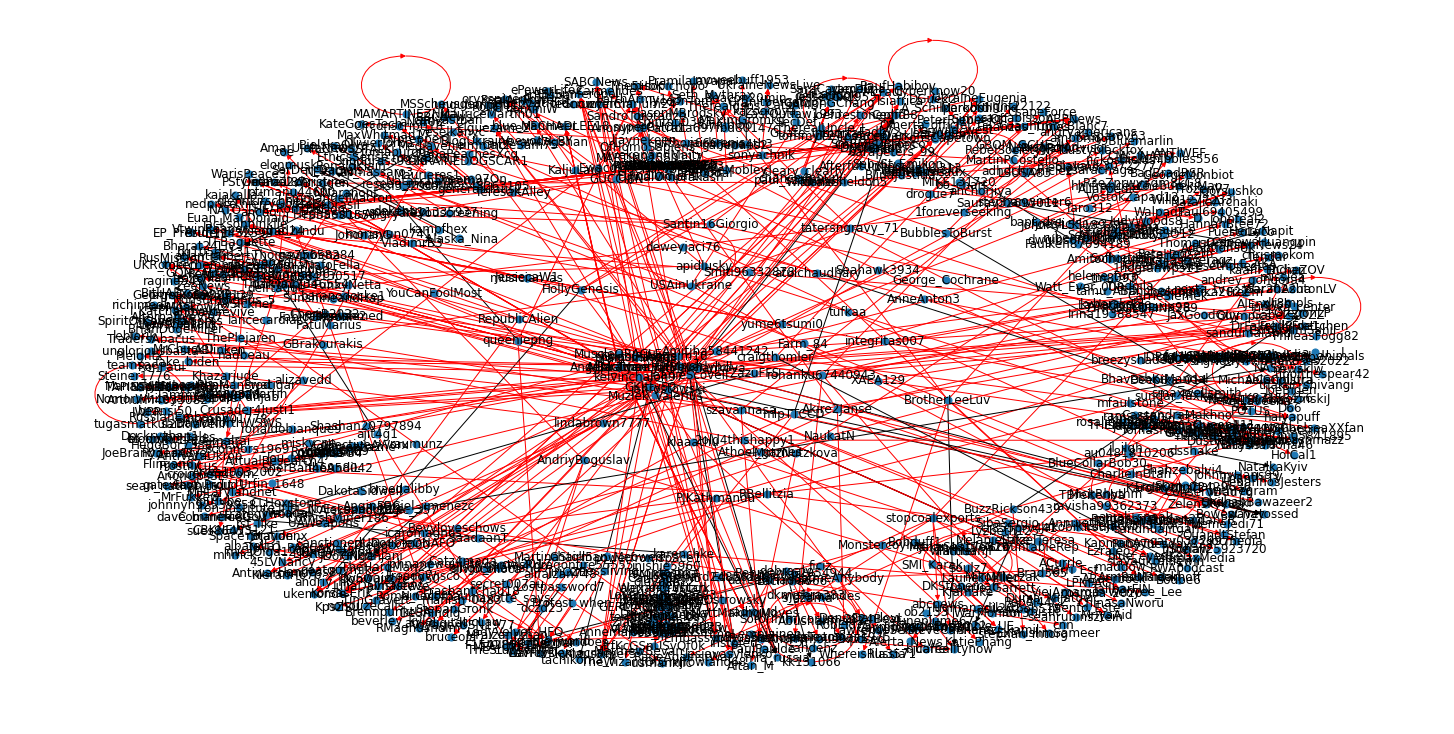

In [46]:
import matplotlib.pyplot as plt

# create network with NetworkX
df5['Nodes'] = df5[['Id1', 'Id2']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df5['Nodes'])

edge_colors = ['red' if e[0] in tweets_df1['Id'] or e[1] in tweets_df1['Id'] else 'black' for e in G.edges]
plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 50, edge_color=edge_colors, font_size = 12)  
plt.show()

# What happens if we remove Bots?

In [ ]:
bot_df = pd.read_csv('botsonly.csv')
bot_df.head()

#Dataframe contains tweets from suspected bots

In [ ]:
import matplotlib.pyplot as plt

# create network with NetworkX
df5['Nodes'] = df5[['Id1', 'Id2']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df5['Nodes'])

edge_colors = ['maroon' if e[0] in bot_df['Id'] or e[1] in bot_df['Id'] else 'black' for e in G.edges]
plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 50, edge_color=edge_colors, font_size = 12)  
plt.show()

In [ ]:
#What Happens if we remove Bots?
tweets_df2 = pd.read_csv('russiaukrainetweets.csv')
tweets_df2 = tweets_df2[~tweets_df2['Id'].isin(bot_df.index)]

In [ ]:
is_retweet = []
for i in tweets_df2['Tweet']:
    if i.startswith("RT"):
        is_retweet.append("RT")
    else:
        is_retweet.append("Tweet")

tweets_df2['is_retweet'] = is_retweet

is_mention = []
for i in tweets_df2['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df2['is_mention'] = is_mention

is_mention = []
for i in tweets_df2['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df2['is_mention'] = is_mention

tokenizer = RegexpTokenizer(r'@\w+')
tweets_df2['Words'] = tweets_df2['Tweet'].apply(lambda x: tokenizer.tokenize(x))

tweets_df2 = tweets_df2.explode('Words')

tweet_identity = []
for i in range(len(tweets_df2['is_mention'])):
    if tweets_df2.iloc[i]['is_mention'] == "Mention":
        tweet_identity.append("Mention")
    else:
        tweet_identity.append(tweets_df2.iloc[i]['is_retweet'])

tweets_df2['tweet_identity'] = tweet_identity
df4 = tweets_df2.drop(['Date Created','Number of Likes', 'is_retweet','is_mention','Tweet','Source of Tweet'], axis=1)
df4 = df4.rename(columns={df4.columns[1]: 'target'})
df4['target'] = df4['target'].fillna(df4['Id'])

df4.head()

In [ ]:
# Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df4, source="Id", target="target")
G

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G) 

def strip_at(X):
    if type(X) is str:
        return X.lstrip('@')
    else:
        return np.nan
df5=df4.copy()  
df5['Words']=df5['Words'].map(strip_at)
df5 = df5[['Id','Words','tweet_identity']]
df5=df5.rename(columns={'Id':'Id1','Words':'Id2','tweet_identity':'Interaction'})
df5 = df5[df5['Id2'].notna()]
df5.to_csv('network_nodes.csv')


import matplotlib.pyplot as plt

# create network with NetworkX
df5['Nodes'] = df5[['Id1', 'Id2']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df5['Nodes'])


plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()
